In [1]:
import implementations as imp
from implementations import ImagePacker
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
import copy
%matplotlib inline

[Kaggle Dataset] (https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat)


In [2]:
cats_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/cat",'gray')
dogs_train_images = imp.read_images("/Users/sameergururajmathad/Documents/CSC - 481/Final Project/animals/dog",'gray')

In [3]:
cats_test_images = copy.deepcopy(cats_train_images)
dogs_test_images = copy.deepcopy(dogs_train_images)

In [4]:
train_packed = ImagePacker(data = [cats_train_images, dogs_train_images])
test_packed = ImagePacker(data = [cats_test_images, dogs_test_images])
# 

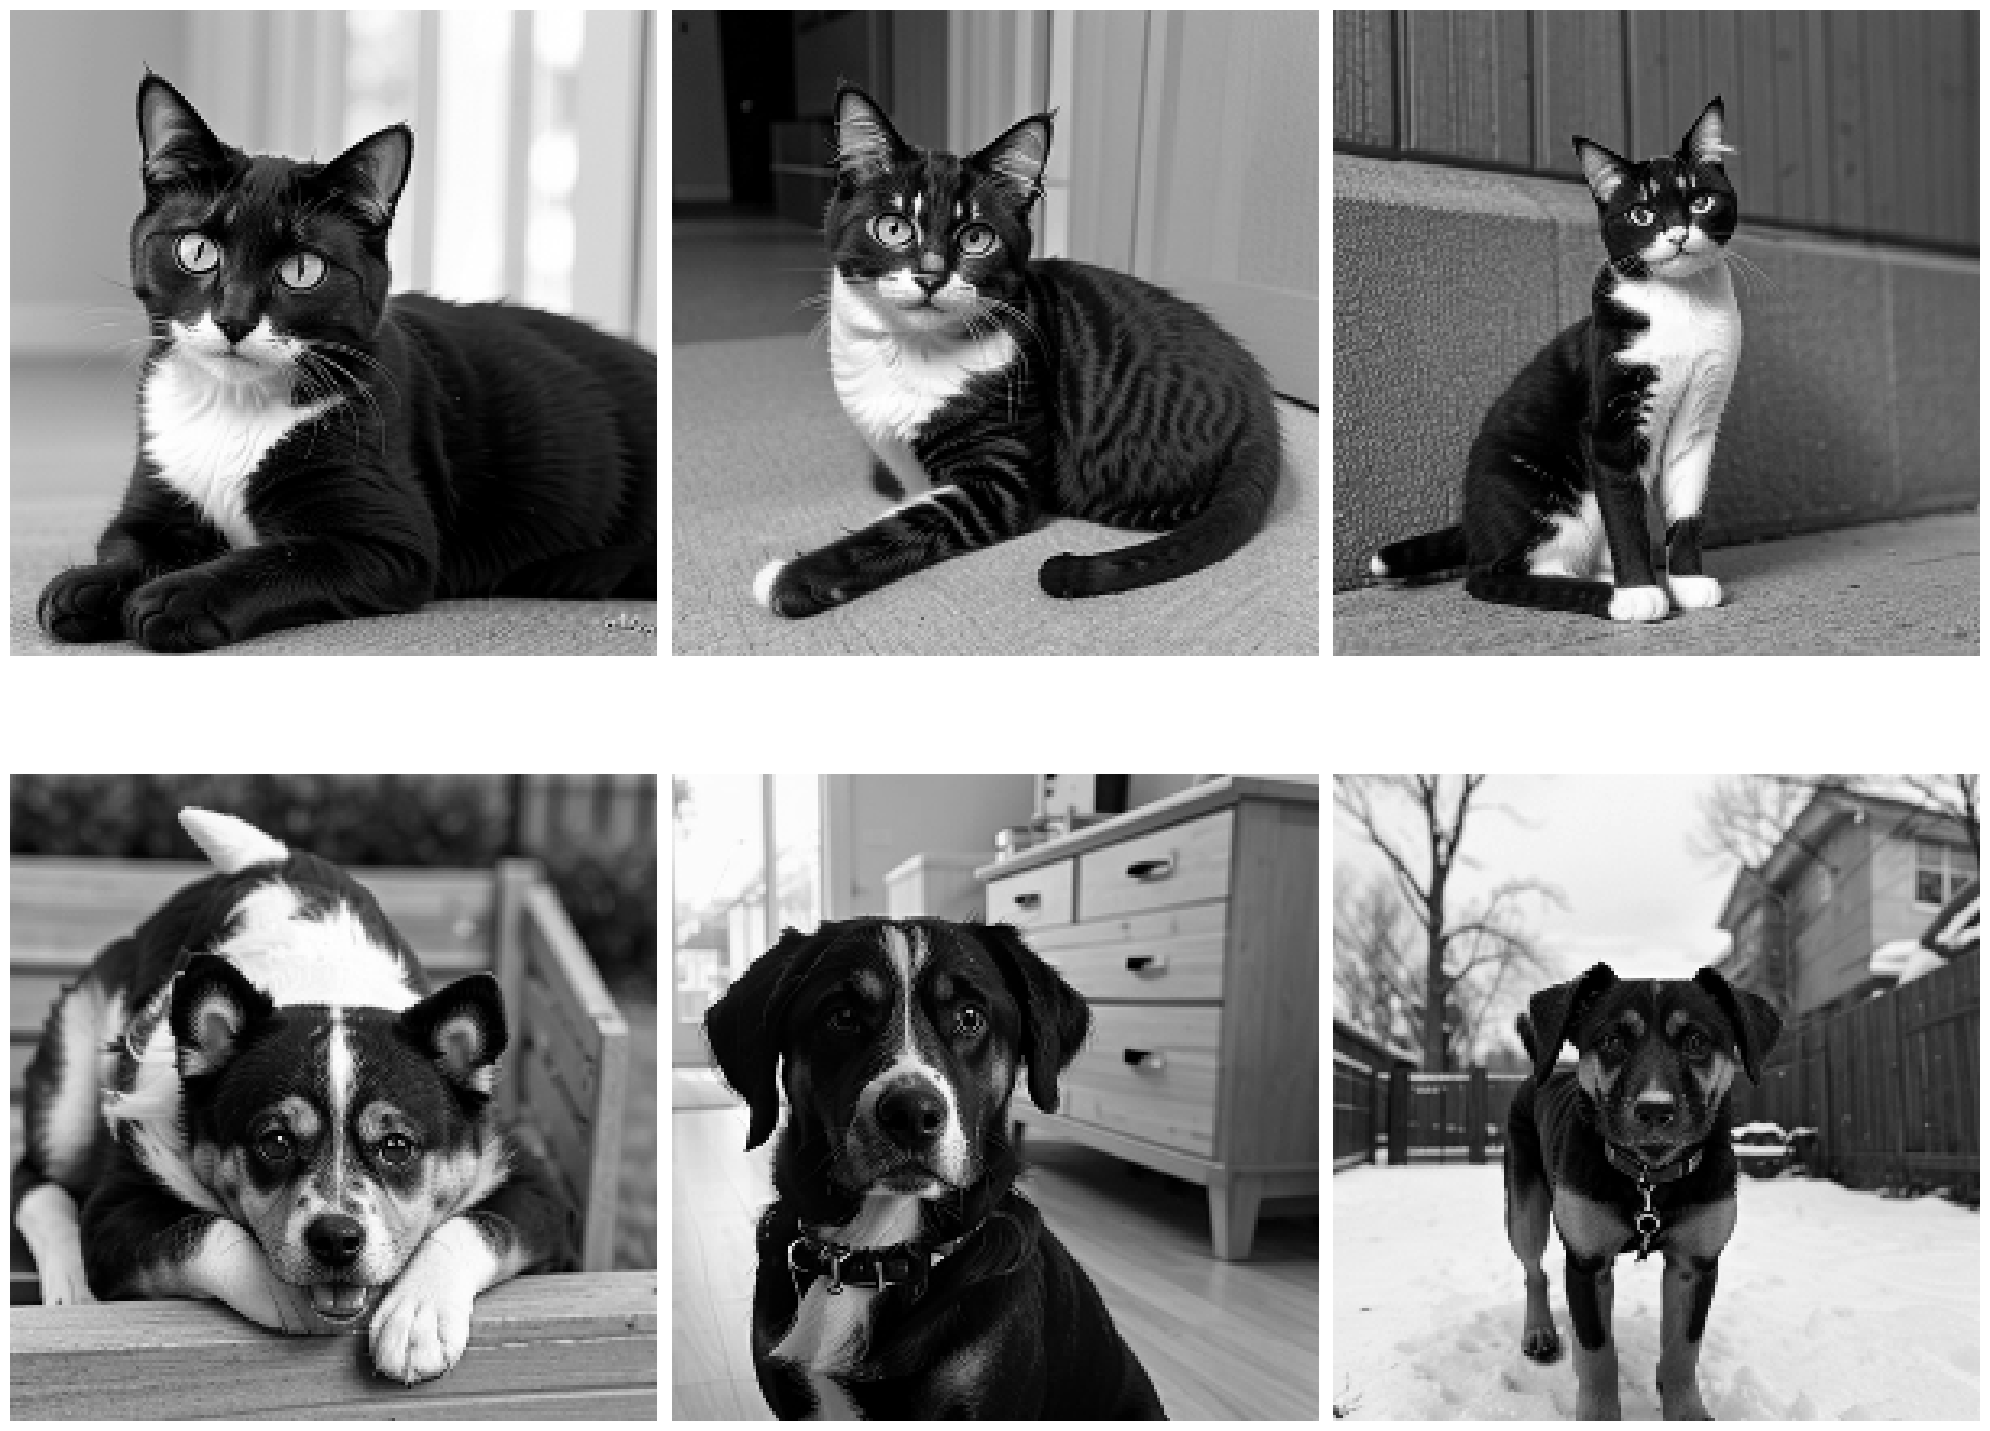

ImagePacker

In [5]:
train_packed

In [6]:
test_packed.rotate_images()

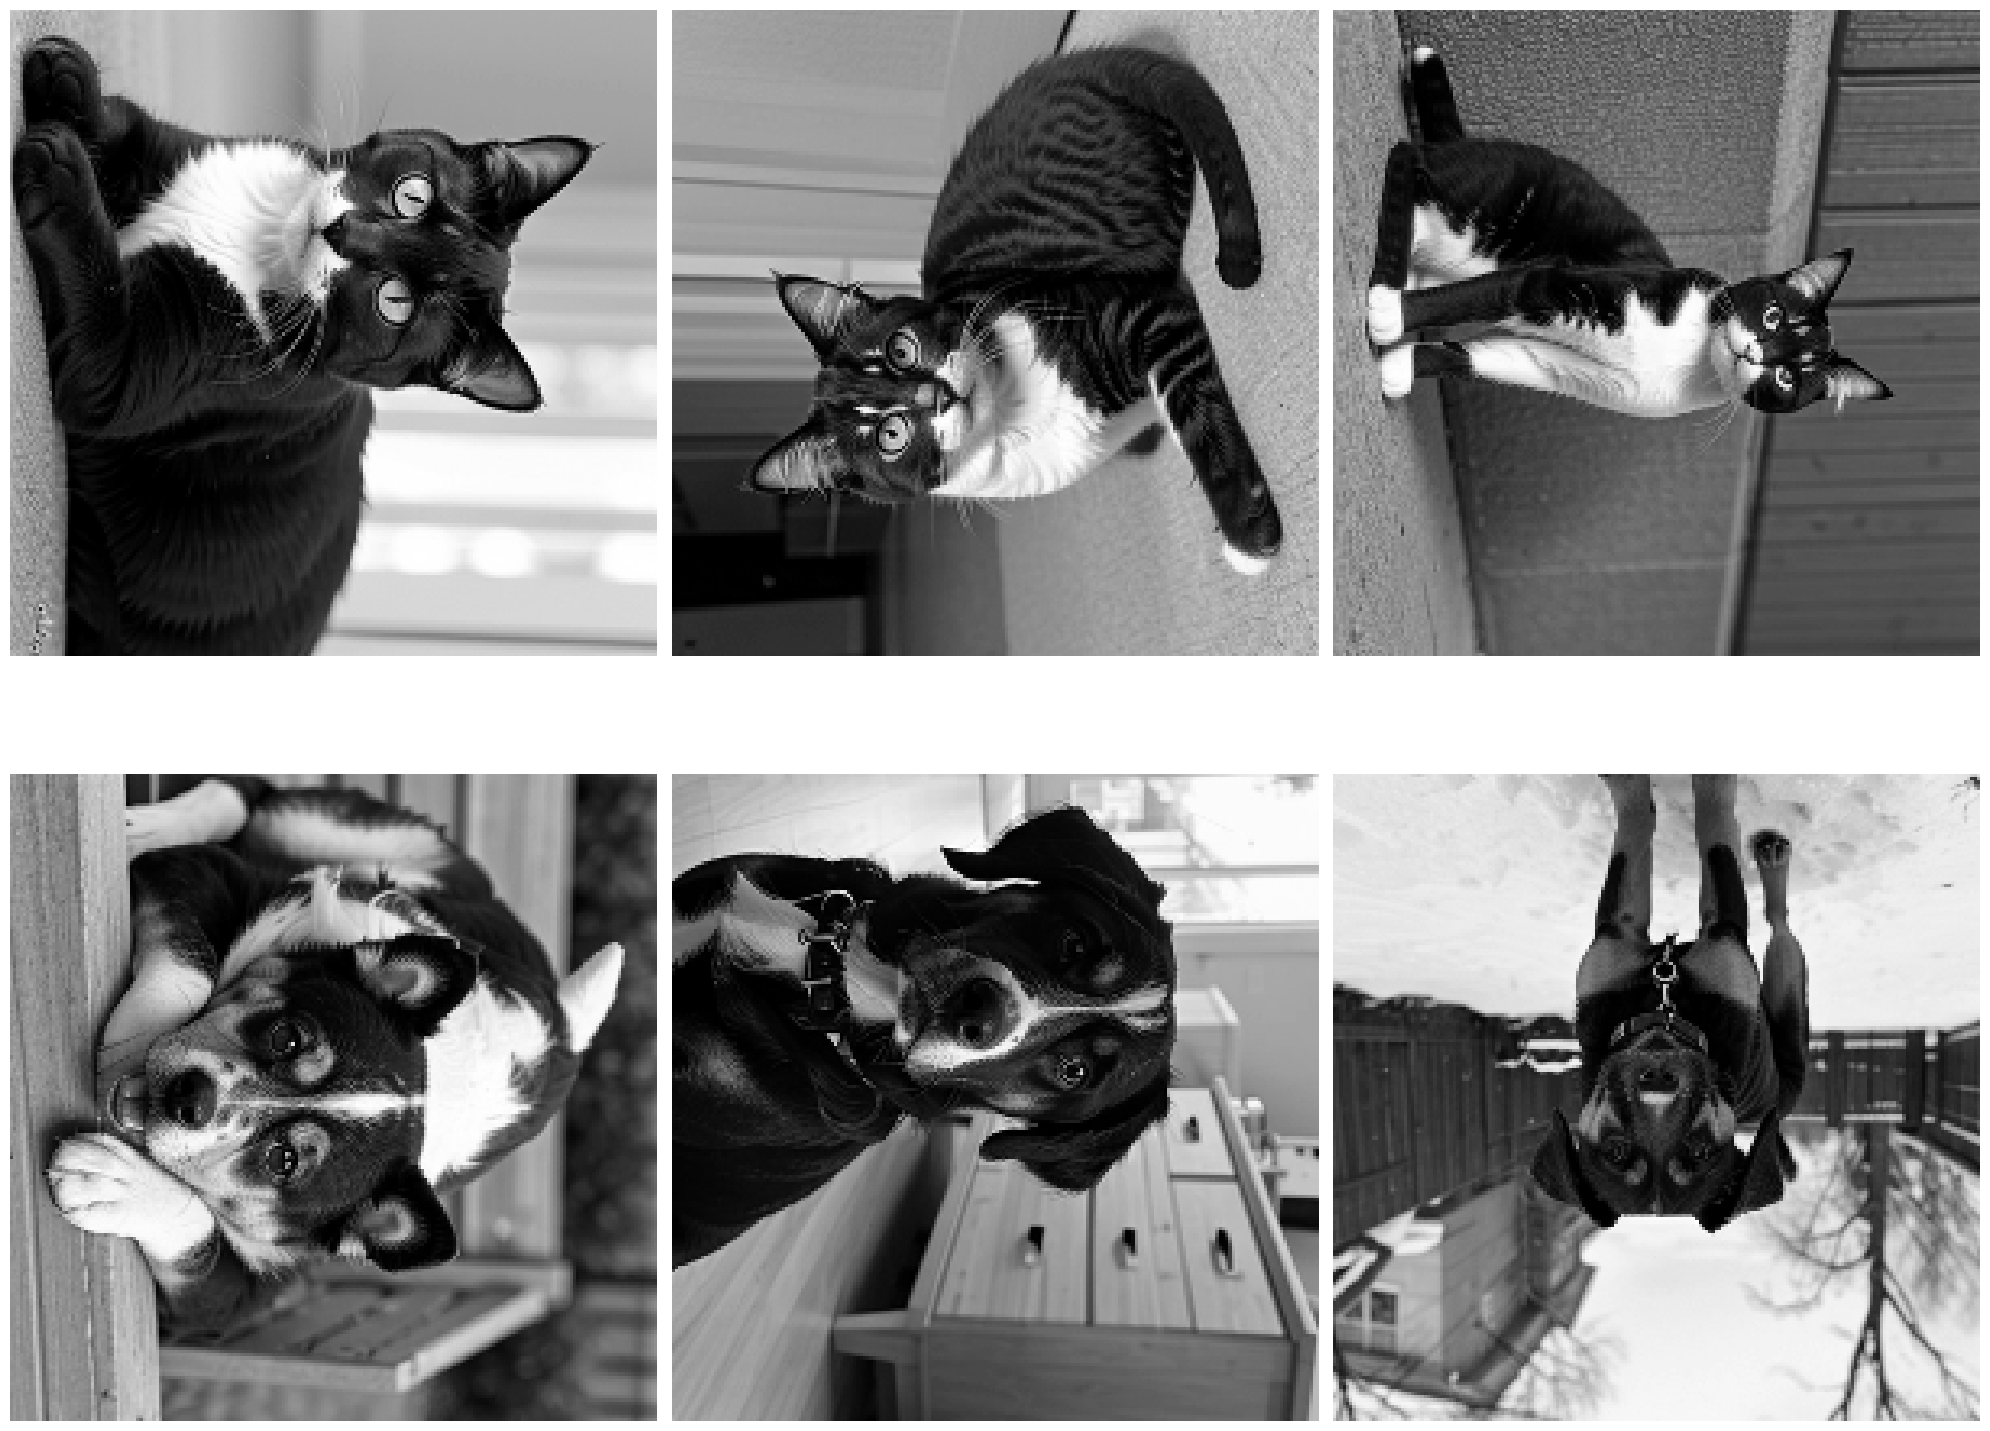

ImagePacker

In [7]:
test_packed

In [8]:
train_sift = train_packed.to_orb(append_label=[1,-1], block_size=8)


In [9]:
test_sift = test_packed.to_orb(append_label=[1,-1], block_size=8)

In [10]:
train_df = train_packed.descriptor_to_df(train_sift)
test_df = test_packed.descriptor_to_df(test_sift)

In [11]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
28,0.386833,0.335097,0.150448,0.225315,0.660705,0.049049,0.197492,0.218034,0.373083,0.568586,...,0.011671,0.018248,0.003607,0.999340,0.014426,0.011405,0.007213,0.000000,0.020929,1
70,0.000000,0.049262,0.046124,0.068128,0.978571,0.046292,0.070698,0.148417,0.063510,0.019016,...,0.220321,0.025584,0.290409,0.199245,0.073013,0.047367,0.000000,0.120516,0.774763,-1
58,0.003772,0.000000,0.000000,0.039217,0.998735,0.031259,0.000000,0.000000,0.000000,0.003634,...,0.345829,0.218721,0.276663,0.340251,0.000000,0.131233,0.138332,0.000000,0.341848,-1
43,0.681005,0.095173,0.421350,0.190347,0.468191,0.000000,0.240772,0.190347,0.000000,0.532414,...,0.116013,0.110059,0.116013,0.700413,0.058006,0.256805,0.116013,0.000000,0.512578,1
37,0.147396,0.082397,0.118543,0.432614,0.701277,0.487950,0.196711,0.041198,0.000000,0.037264,...,0.197850,0.093848,0.197850,0.774210,0.436676,0.281545,0.197850,0.000000,0.136466,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0.000000,0.000000,0.000000,0.176160,0.981813,0.068957,0.000000,0.015961,0.000000,0.038546,...,0.000000,0.218759,0.454681,0.696088,0.245919,0.109380,0.259416,0.000000,0.014974,1
73,0.000000,0.000000,0.002223,0.000000,0.999998,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001552,0.021440,0.999745,0.000000,0.003103,0.001227,0.000000,0.003702,-1
91,0.000000,0.034359,0.295506,0.220052,0.724416,0.430603,0.228941,0.316956,0.000000,0.102060,...,0.011926,0.018784,0.000000,0.999618,0.014797,0.007122,0.000000,0.000000,0.004038,-1
98,0.688428,0.000000,0.389434,0.153937,0.481900,0.307874,0.000000,0.153937,0.000000,0.544892,...,0.060365,0.076356,0.120729,0.134979,0.490707,0.727732,0.415434,0.055653,0.084546,-1


In [12]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,target
89,0.129560,0.000000,0.082009,0.624029,0.685841,0.326243,0.044951,0.090794,0.000000,0.229314,...,0.658015,0.278013,0.433761,0.247690,0.338522,0.171043,0.227213,0.026671,0.320925,-1
37,0.192673,0.689645,0.362395,0.406281,0.192716,0.008566,0.037924,0.228158,0.316488,0.250256,...,0.421563,0.062586,0.000000,0.000000,0.000000,0.000000,0.000000,0.105474,0.756121,1
65,0.815641,0.086391,0.000000,0.000000,0.012068,0.000000,0.000000,0.338668,0.460896,0.775707,...,0.101285,0.110519,0.419853,0.893294,0.036365,0.031565,0.003204,0.030639,0.003773,-1
70,0.077527,0.082102,0.116583,0.194989,0.507700,0.219346,0.445106,0.347858,0.557351,0.404521,...,0.275773,0.137679,0.089836,0.469384,0.475933,0.118227,0.335434,0.266906,0.428460,-1
32,0.121359,0.301724,0.039710,0.138546,0.488091,0.265844,0.561931,0.425933,0.259560,0.115899,...,0.414016,0.311414,0.311088,0.396083,0.477288,0.379552,0.223274,0.056060,0.224271,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.342889,0.090203,0.114098,0.000000,0.181529,0.353073,0.345120,0.764560,0.000000,0.468336,...,0.037389,0.034503,0.655860,0.695522,0.270355,0.013109,0.037439,0.093580,0.002398,-1
46,0.331133,0.074044,0.374634,0.370218,0.728493,0.000000,0.234146,0.148087,0.000000,0.159198,...,0.031753,0.060816,0.630019,0.731496,0.225414,0.068266,0.000000,0.042863,0.063052,1
85,0.355995,0.298511,0.251727,0.298511,0.711991,0.298511,0.188795,0.000000,0.000000,0.613638,...,0.126807,0.000000,0.000000,0.017329,0.056460,0.012253,0.070189,0.645227,0.770675,-1
75,0.666462,0.258155,0.581862,0.076469,0.185466,0.200884,0.197648,0.165886,0.058649,0.677402,...,0.053311,0.163905,0.435957,0.712662,0.134642,0.348032,0.039936,0.251195,0.272422,-1


In [13]:
train_X, train_y = train_df.iloc[:,:-1], train_df.iloc[:,-1]
test_X, test_y = test_df.iloc[:,:-1], test_df.iloc[:,-1]

In [14]:
model = SVC()
model.fit(train_X, train_y)


SVC()

In [15]:
predictions = model.predict(test_X)


In [16]:
f"Accuracy: {round(accuracy_score(test_y, predictions)*100,3)} %"

'Accuracy: 52.0 %'

In [17]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

          -1       0.52      0.68      0.59        50
           1       0.53      0.36      0.43        50

    accuracy                           0.52       100
   macro avg       0.52      0.52      0.51       100
weighted avg       0.52      0.52      0.51       100



In [18]:
mat = confusion_matrix(test_y, predictions)

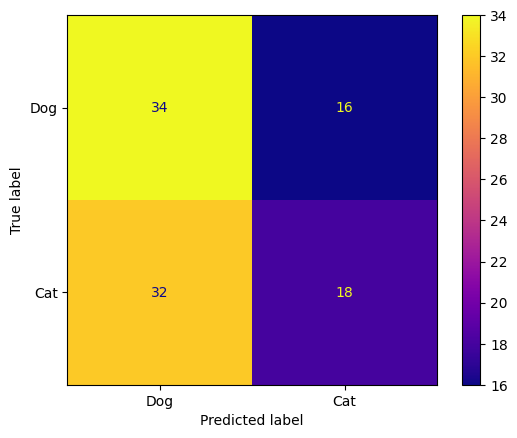

In [22]:
cmd = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=['Dog', 'Cat'])
cmd.plot(cmap="plasma")